<a href="https://colab.research.google.com/github/Gilbert228/Prediction-of-Seoul-Bike-count-/blob/main/LinearRegression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing required libraries

In [ ]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white',color_codes=True)

## reading dataset

In [ ]:
seoul=pd.read_csv('/content/drive/MyDrive/Dataset/SeoulBikeData.csv')

In [ ]:
print('Dimension of data dataset ', seoul.shape)

Dimension of data dataset  (8760, 14)


In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [ ]:
seoul.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
seoul.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
seoul.isnull().sum()


Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

There are no missing value in the dataset 

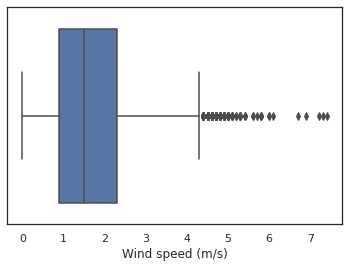

In [ ]:
sns.boxplot(x='Wind speed (m/s)',data=seoul)

In [ ]:
Q1,Q3 = np.percentile(seoul['Wind speed (m/s)'],[25,75])
IQR = Q3 - Q1
print(IQR)


1.4


In [ ]:
low_limit = Q1 - (1.5*IQR)
up_limit = Q3 + (1.5*IQR)
print(low_limit,up_limit)

-1.1999999999999997 4.3999999999999995


In [ ]:
seoul = seoul[seoul['Wind speed (m/s)']<up_limit]
seoul = seoul[seoul['Wind speed (m/s)']>low_limit]


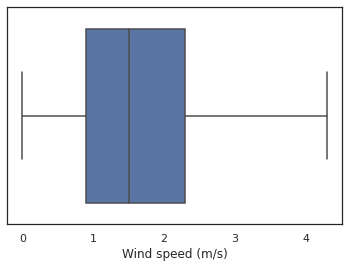

In [ ]:
sns.boxplot(x='Wind speed (m/s)',data=seoul)

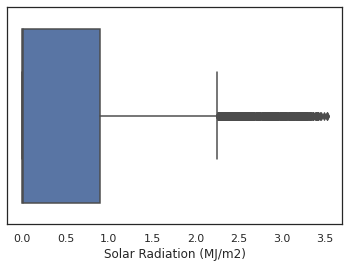

In [ ]:
sns.boxplot(x='Solar Radiation (MJ/m2)',data=seoul)

In [ ]:
seoul['Visibility (10m)'].value_counts()

2000    2198
1995      32
1989      28
1985      28
1999      27
        ... 
655        1
140        1
81         1
1573       1
1688       1
Name: Visibility (10m), Length: 1788, dtype: int64

In [ ]:
seoul.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
seoul['Rainfall(mm)'].unique()

array([ 0. ,  0.5,  1. ,  2.5,  0.1,  0.2,  0.3,  0.7,  1.6,  0.4,  1.1,
        6.4,  9.5,  3.5,  3.3,  1.4,  1.5,  3.7,  4.5,  9. ,  2. ,  8. ,
       17. ,  7. ,  3. ,  1.9,  0.8,  4. ,  0.9,  6. ,  5. ,  5.5,  2.4,
       35. , 19. , 13.5, 10. , 12.5, 11.5,  5.4, 10.5,  6.5, 16. , 14.5,
        4.9, 21.5, 12. , 18.5,  7.5, 24. ,  8.5,  7.3,  1.3, 15.5, 29.5,
       21. , 13. ,  1.2, 18. ,  9.1,  1.8])

In [ ]:
seoul.sample(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3115,09/04/2018,1599,19,13.4,33,1.2,1356,-2.5,0.15,0.0,0.0,Spring,No Holiday,Yes
7521,10/10/2018,1097,9,12.0,72,3.3,1650,7.0,0.68,0.0,0.0,Autumn,No Holiday,Yes
522,22/12/2017,671,18,4.9,63,0.6,677,-1.5,0.00,0.0,0.0,Winter,Holiday,Yes
1471,31/01/2018,124,7,-3.5,83,1.6,953,-5.9,0.00,0.0,3.5,Winter,No Holiday,Yes
4836,20/06/2018,1252,12,25.2,53,3.3,976,14.9,3.38,0.0,0.0,Summer,No Holiday,Yes
2502,15/03/2018,10,6,14.4,96,0.7,453,13.7,0.00,8.0,0.0,Spring,No Holiday,Yes
2828,28/03/2018,1133,20,15.2,65,2.2,988,8.6,0.00,0.0,0.0,Spring,No Holiday,Yes
7447,07/10/2018,345,7,14.3,89,0.6,1165,12.5,0.03,0.0,0.0,Autumn,No Holiday,Yes
4703,14/06/2018,1295,23,21.6,68,0.8,2000,15.4,0.00,0.0,0.0,Summer,No Holiday,Yes
5343,11/07/2018,1106,15,29.4,68,2.3,1525,22.8,1.29,0.0,0.0,Summer,No Holiday,Yes


In [ ]:
seoul['Functioning Day'].value_counts()

Yes    8311
No      288
Name: Functioning Day, dtype: int64

In [ ]:
seoul['Holiday'].value_counts()

No Holiday    8179
Holiday        420
Name: Holiday, dtype: int64

In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8599 non-null   object 
 1   Rented Bike Count         8599 non-null   int64  
 2   Hour                      8599 non-null   int64  
 3   Temperature(C)            8599 non-null   float64
 4   Humidity(%)               8599 non-null   int64  
 5   Wind speed (m/s)          8599 non-null   float64
 6   Visibility (10m)          8599 non-null   int64  
 7   Dew point temperature(C)  8599 non-null   float64
 8   Solar Radiation (MJ/m2)   8599 non-null   float64
 9   Rainfall(mm)              8599 non-null   float64
 10  Snowfall (cm)             8599 non-null   float64
 11  Seasons                   8599 non-null   object 
 12  Holiday                   8599 non-null   object 
 13  Functioning Day           8599 non-null   object 
dtypes: float

In [ ]:
categorical_values  =seoul[['Seasons','Holiday','Functioning Day']]
categorical_values

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


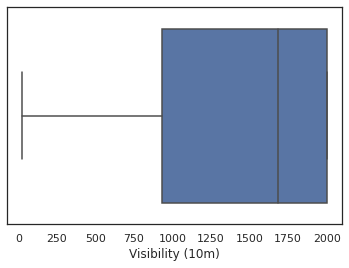

In [ ]:
sns.boxplot(x='Visibility (10m)',data=seoul)

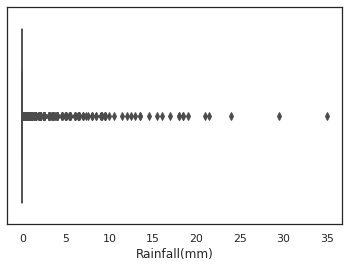

In [ ]:
sns.boxplot(x='Rainfall(mm)',data=seoul)

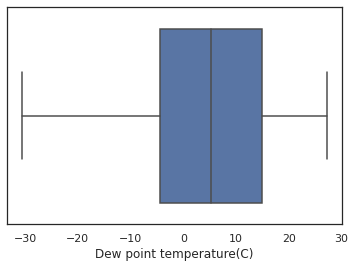

In [ ]:
sns.boxplot(x='Dew point temperature(C)',data=seoul)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
seoul['Seasons']=le.fit_transform(seoul['Seasons'])
seoul['Functioning Day']=le.fit_transform(seoul['Functioning Day'])
seoul['Holiday']=le.fit_transform(seoul['Holiday'])


In [ ]:
seoul.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [ ]:
seoul['Date']=pd.to_datetime(seoul['Date'])


In [ ]:
seoul['month']=seoul['Date'].dt.month
seoul['year']=seoul['Date'].dt.year

In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8599 non-null   datetime64[ns]
 1   Rented Bike Count         8599 non-null   int64         
 2   Hour                      8599 non-null   int64         
 3   Temperature(C)            8599 non-null   float64       
 4   Humidity(%)               8599 non-null   int64         
 5   Wind speed (m/s)          8599 non-null   float64       
 6   Visibility (10m)          8599 non-null   int64         
 7   Dew point temperature(C)  8599 non-null   float64       
 8   Solar Radiation (MJ/m2)   8599 non-null   float64       
 9   Rainfall(mm)              8599 non-null   float64       
 10  Snowfall (cm)             8599 non-null   float64       
 11  Seasons                   8599 non-null   int64         
 12  Holiday             

In [ ]:
seoul.drop(['Date'],axis='columns', inplace=True)

In [ ]:
seoul_cor =seoul.corr()
seoul_cor

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
Rented Bike Count,1.000000,0.415177,0.537405,-0.205049,0.150896,0.200895,0.378650,0.264717,-0.123076,-0.140847,-0.248009,0.070818,0.203563,0.072466,0.215120
Hour,0.415177,1.000000,0.128315,-0.240293,0.289811,0.097055,0.007803,0.144596,0.007647,-0.020185,-0.001869,0.000624,0.003992,-0.000566,0.001704
Temperature(C),0.537405,0.128315,1.000000,0.150682,-0.013465,0.041172,0.912907,0.363061,0.048435,-0.217741,-0.326585,0.052643,-0.048441,0.049846,0.378592
Humidity(%),-0.205049,-0.240293,0.150682,1.000000,-0.329534,-0.538682,0.529182,-0.455914,0.235632,0.108859,-0.115907,0.050655,-0.021152,0.050275,0.030595
Wind speed (m/s),0.150896,0.289811,-0.013465,-0.329534,1.000000,0.167182,-0.153652,0.327953,-0.022553,-0.005046,0.107323,-0.018555,0.008071,-0.096351,0.006843
Visibility (10m),0.200895,0.097055,0.041172,-0.538682,0.167182,1.000000,-0.168780,0.142566,-0.165679,-0.121728,-0.017510,-0.035837,-0.026374,0.077034,0.057463
Dew point temperature(C),0.378650,0.007803,0.912907,0.529182,-0.153652,-0.168780,1.000000,0.106464,0.123775,-0.151155,-0.320877,0.064417,-0.051820,0.066781,0.336195
Solar Radiation (MJ/m2),0.264717,0.144596,0.363061,-0.455914,0.327953,0.142566,0.106464,1.000000,-0.072957,-0.071106,-0.072638,0.009181,-0.003690,-0.029420,0.129345
Rainfall(mm),-0.123076,0.007647,0.048435,0.235632,-0.022553,-0.165679,0.123775,-0.072957,1.000000,0.008838,-0.017554,0.013713,0.001484,-0.021701,0.026909
Snowfall (cm),-0.140847,-0.020185,-0.217741,0.108859,-0.005046,-0.121728,-0.151155,-0.071106,0.008838,1.000000,0.143436,0.012848,0.031734,0.055173,-0.209833


<function matplotlib.pyplot.show(*args, **kw)>

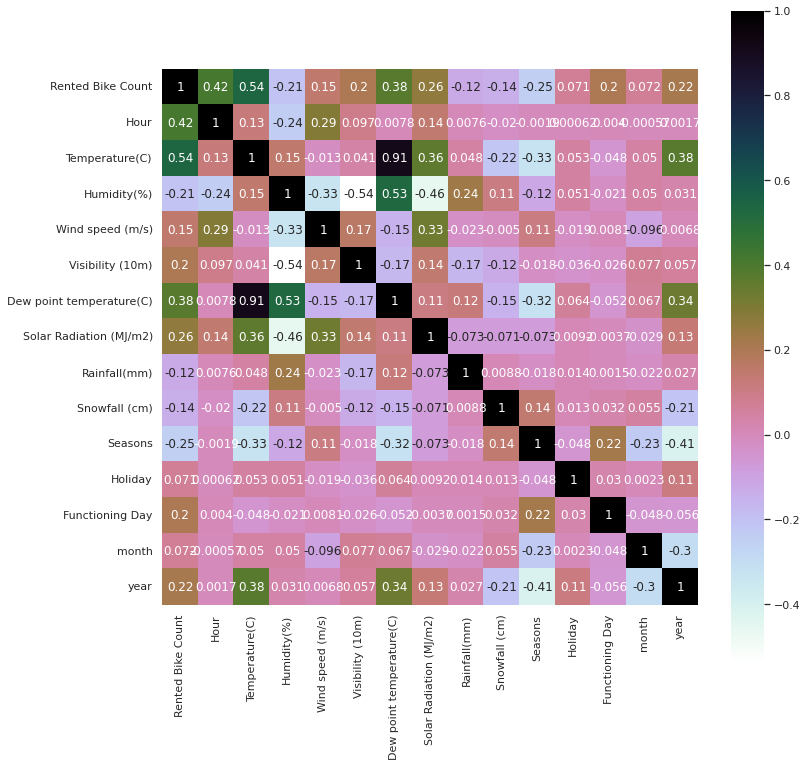

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(seoul_cor, annot=True, cmap='cubehelix_r', square=True)
plt.show

In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8599 non-null   int64  
 1   Hour                      8599 non-null   int64  
 2   Temperature(C)            8599 non-null   float64
 3   Humidity(%)               8599 non-null   int64  
 4   Wind speed (m/s)          8599 non-null   float64
 5   Visibility (10m)          8599 non-null   int64  
 6   Dew point temperature(C)  8599 non-null   float64
 7   Solar Radiation (MJ/m2)   8599 non-null   float64
 8   Rainfall(mm)              8599 non-null   float64
 9   Snowfall (cm)             8599 non-null   float64
 10  Seasons                   8599 non-null   int64  
 11  Holiday                   8599 non-null   int64  
 12  Functioning Day           8599 non-null   int64  
 13  month                     8599 non-null   int64  
 14  year    

In [ ]:
x = seoul.drop(['Rented Bike Count'],axis=1)
y =seoul['Rented Bike Count']

In [ ]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8599, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20)


In [ ]:
X_train.shape

(6879, 14)

In [ ]:
Y_test.shape

(1720,)

In [ ]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train,Y_train)

LinearRegression()

In [ ]:
ln_pred=ln.predict(X_test) # testing data

In [ ]:
model_score = ln.score(X_test,Y_test)
print(model_score)

0.5486636913008549


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln.predict(X_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(Y_test,df_pred))
print('Mean Square Error of linear regression:', mean_squared_error(Y_test,df_pred))
print('R_Squared Score of linear regression:', r2_score(Y_test,df_pred))



Mean Absolute Error of linear regression: 327.03107706781117
Mean Square Error of linear regression: 195407.88278149988
R_Squared Score of linear regression: 0.5486636913008549


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [ ]:
ridge.fit(X_train,Y_train)
ridge_score = ridge.score(X_test,Y_test)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_



array([ 2.67938826e+01,  2.08659782e+01, -1.02384791e+01,  3.54004518e+01,
        1.48755806e-02,  9.59495041e+00, -9.04357210e+01, -5.60969588e+01,
        2.32818183e+01, -1.03830182e+02,  1.51074090e+02,  9.03463433e+02,
        2.99751146e+00, -6.37440149e+01])

In [ ]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.5485753836681799
number of feature used: 14


In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso

Lasso()

In [ ]:
lasso.fit(X_train,Y_train)
lasso_score=lasso.score(X_test,Y_test)
coeff_used=np.sum(lasso.coef_!=0)
lasso.coef_

array([ 2.69289429e+01,  2.09533003e+01, -1.00288159e+01,  3.30953439e+01,
        1.51229797e-02,  9.19465547e+00, -8.65024727e+01, -5.55025555e+01,
        1.86618265e+01, -9.89021279e+01,  1.28835807e+02,  8.72538075e+02,
        3.85949327e+00, -3.76045689e+01])

In [ ]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.5483979485107005
number of feature used: 14
